# Impact of interventions on curbing the impact of COVID-19

                                                        
 
 
 
This study investigates the effectiveness of the government measures aimed to decelerate the spread of COVID-19. The various government measures are weighted with the different time intervals of responds, calculated from the first case detected in the country. In case of lack of a measure, I used a large penalty number. COVID spread is represented by total deaths per million population (10th of July). A Random Forest model is definded to determine the main factors affecting the number of deaths in each country worldwide. Unfortunately, treeinterpreter did not work in this notebook.

Main findings:

Top government measures overall:
- State of emergency declared
- Requirement to wear protective gear in public
- International flights suspension



Data source: acaps.org


In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

Reading and cleaning data:

In [3]:
df = pd.read_csv("/kaggle/input/data.csv", index_col='COUNTRY')

In [4]:
df.head()

,Additional health/documents requirements upon arrival,Amendments to funeral and burial regulations,Awareness campaigns,Border checks,Border closure,Changes in prison-related policies,Checkpoints within the country,Closure of businesses and public services,Complete border closure,Curfews,...,Partial lockdown,Psychological assistance and medical social work,Requirement to wear protective gear in public,Schools closure,State of emergency declared,Strengthening the public health system,Surveillance and monitoring,Testing policy,Visa restrictions,Deaths per Population*1000000
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,-31.0,-23.0,0.0,36.0,NaN,NaN,NaN,NaN,...,33.0,NaN,NaN,6.0,0.0,-22.0,-11.0,NaN,NaN,"24,7012930959163"
Albania,NaN,NaN,2.0,NaN,5.0,14.0,1.0,1.0,NaN,14.0,...,24.0,NaN,NaN,1.0,52.0,-45.0,35.0,NaN,NaN,"28,8352637905518"
Algeria,NaN,NaN,9.0,16.0,21.0,NaN,27.0,20.0,NaN,27.0,...,27.0,NaN,72.0,16.0,NaN,NaN,NaN,NaN,NaN,"22,6161387942366"
Angola,20.0,NaN,-9.0,7.0,7.0,13.0,NaN,7.0,NaN,NaN,...,37.0,NaN,27.0,3.0,7.0,6.0,43.0,50.0,-19.0,"0,673920852835811"
Antigua and Barbuda,83.0,15.0,-10.0,NaN,13.0,15.0,NaN,12.0,NaN,15.0,...,34.0,NaN,15.0,2.0,12.0,-30.0,113.0,NaN,-42.0,"30,6861421382104"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Zimbabwe
Data columns (total 36 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Additional health/documents requirements upon arrival         52 non-null     float64
 1   Amendments to funeral and burial regulations                  32 non-null     float64
 2   Awareness campaigns                                           123 non-null    float64
 3   Border checks                                                 49 non-null     float64
 4   Border closure                                                153 non-null    float64
 5   Changes in prison-related policies                            64 non-null     float64
 6   Checkpoints within the country                                33 non-null     float64
 7   Closure of businesses and public services                    

In [6]:
df['Deaths per Population*1000000']=df['Deaths per Population*1000000'].apply(lambda x: x.replace(",","."))

In [7]:
df['Deaths per Population*1000000']=df['Deaths per Population*1000000'].astype(float)

In [8]:
df.fillna(value=1000000, inplace=True)

Splitting data into train and test data to find the best Random Forest model:

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop('Deaths per Population*1000000', axis=1)
y=df['Deaths per Population*1000000']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [12]:
rf_1=RandomForestRegressor(n_estimators=10, random_state=40)
rf_2=RandomForestRegressor(n_estimators=30, random_state=40)
rf_3=RandomForestRegressor(n_estimators=50, random_state=40)
rf_4=RandomForestRegressor(n_estimators=100, random_state=40)
rf_5=RandomForestRegressor(n_estimators=200, random_state=40)

Model selection:

In [13]:
def score_model(model):
    model.fit(X_train, y_train)
    preds=model.predict(X_test)
    return mean_absolute_error(y_test, preds)

In [14]:
models=[rf_1, rf_2, rf_3, rf_4, rf_5]

In [15]:
for i in range(0, len(models)):
    mae=score_model(models[i])
    print("Random Forest Model %d MAE: %d"%(i+1, mae))

Random Forest Model 1 MAE: 117
Random Forest Model 2 MAE: 269
Random Forest Model 3 MAE: 385
Random Forest Model 4 MAE: 328
Random Forest Model 5 MAE: 378


Fitting the best Random Forest model and calculatin importance of the features:

In [16]:
from sklearn.inspection import permutation_importance

In [17]:
model=RandomForestRegressor(n_estimators=200).fit(X,y)
result=permutation_importance(model, X, y, n_repeats=10,random_state=0)

In [18]:
importances = model.feature_importances_

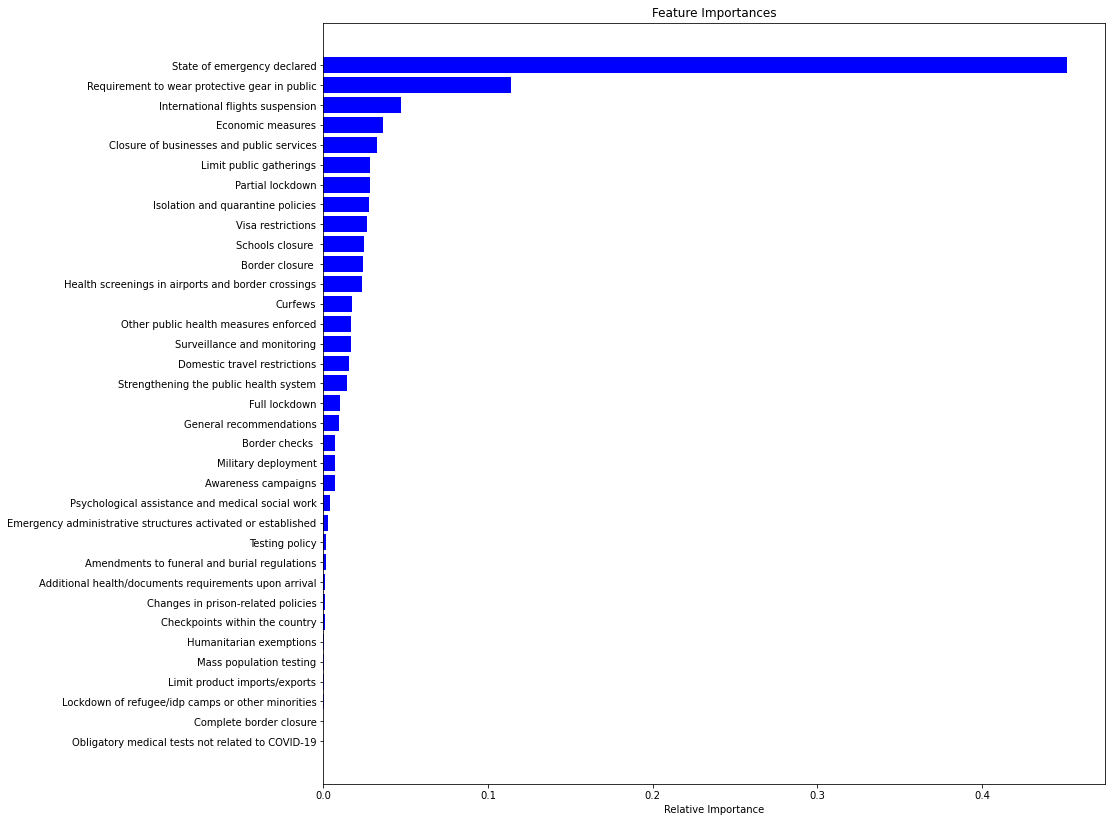

In [19]:
features=X.columns
indices = np.argsort(importances)
plt.figure(figsize=(14,14))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Prediction and interpretation for my home country, Hungary

In [20]:
from treeinterpreter import treeinterpreter as ti

ModuleNotFoundError: No module named 'treeinterpreter'

In [21]:
hun=df.loc['Hungary'][:-1]

In [22]:
df.loc['Hungary'][-1:]

Deaths per Population*1000000    61.147259
Name: Hungary, dtype: float64

In [23]:
hun=pd.DataFrame(hun)

In [24]:
hun=hun.transpose()

In [25]:
X_hun=X.drop('Hungary')
y_hun=y.drop('Hungary')

In [26]:
model_hun=RandomForestRegressor(n_estimators=200).fit(X_hun,y_hun)

In [27]:
model_hun.predict(hun)

array([56.9888008])

In [28]:
prediction, bias, contributions = ti.predict(model_hun, hun)

NameError: name 'ti' is not defined

In [29]:
result=pd.DataFrame(data=contributions.transpose(), index=X.columns, columns=['Contributions']).head()

NameError: name 'contributions' is not defined


**Top contributors for Hungary:**

State of emergency declared	-1721.639864

Economic measures	-506.961691

International flights suspension	-49.569132

Health screenings in airports and border crossings	-12.891331

Limit public gatherings	-9.477808


Model evaluation:
- Prediction for Hungary was quite close, however mean absolute error values should be reduced.
- Top contributors seem to be appropriate.

Further investigations:
    - Defining control variables: checking quarantine regulations via google, apple mobility data, vaccination from OECD data, general healthcare infrastructure 
    - Other models, such as XGBoost, ANN
    - Model selection with cross validation
    - Extracting the state of emergency feature from the model, to see the effect of more specific features